In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df=pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [130]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Data Cleaning

In [131]:
# Fill missing values of the Director column. #
df['director']=df['director'].fillna("Unknown")

In [132]:
# Fill missing values of the cast column. #
df['cast'] = df['cast'].fillna("No Data")

In [133]:
# Fill missing values of the country column. #
df['country']=df['country'].fillna("No Data")

In [134]:
# Fill missing values of the date_added column #
df['date_added']=df['date_added'].fillna("No Data")

In [135]:
# Convert to datetime object. #
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), format='mixed', errors='coerce')


In [136]:
#keep only valid ratings in dataset
valid_ratings = ['TV-MA','TV-14','TV-PG','R','PG-13','TV-Y7','TV-Y','PG','TV-G','NR','G','TV-Y7-FV','NC-17','UR']
df=df[df['rating'].isin(valid_ratings)]


In [137]:
# clean duration column #
df.loc[df['type']=='Movie','duration']=(
df.loc[df['type']=='Movie','duration'].astype(str).str.replace(' min','').astype(int)
)


In [138]:
# Create a new columns by extracting duration column #
movies=df[df['type']=='Movie']
df['duration_minutes']=movies['duration']
df['duration_minutes']=df['duration_minutes'].fillna('TV Show')
tvshow_id = df['type'] == 'TV Show'

df.loc[tvshow_id, 'num_seasons'] = (
    df.loc[tvshow_id, 'duration']
      .astype(str)
      .str.replace(r' Season(s)?', '', regex=True)  
      .str.strip()                                 
      .astype(int)                                 
)
df['num_seasons']=df['num_seasons'].fillna('Movie')

In [139]:
# remove the duration column #
df=df.drop(columns=['duration'])

### Data visualization ###

### Overall balance between Movies and TV Shows on Netflix ###

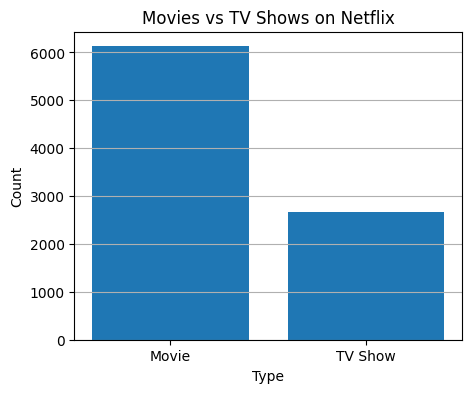

In [180]:


type_counts = df['type'].value_counts()

plt.figure(figsize=(5,4))
plt.bar(type_counts.index, type_counts.values)

plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

### The total number of content added to Netflix changed over the years ###

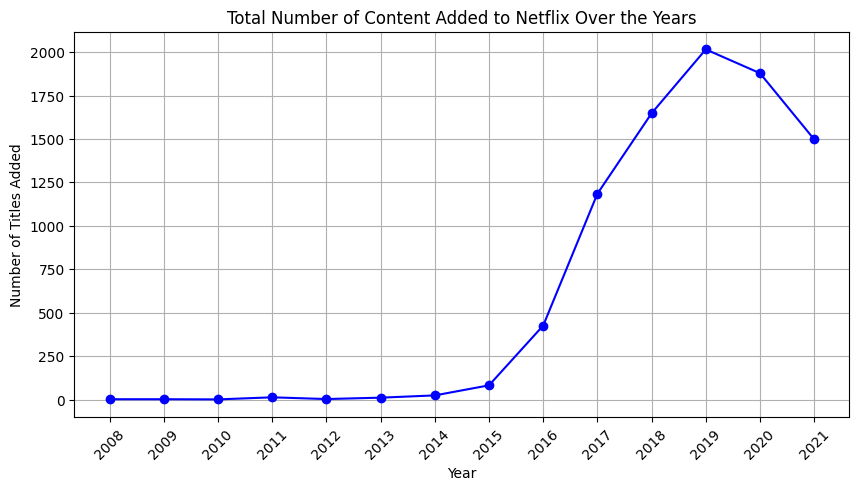

In [181]:


df['year_added']=df['date_added'].dt.year

yearly_counts=df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', color='blue')
plt.title("Total Number of Content Added to Netflix Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.xticks(yearly_counts.index, rotation=45)
plt.grid(True)

plt.show()

### The total number of content added to Netflix changed over the years(Separate Movies vs TV Shows) ###

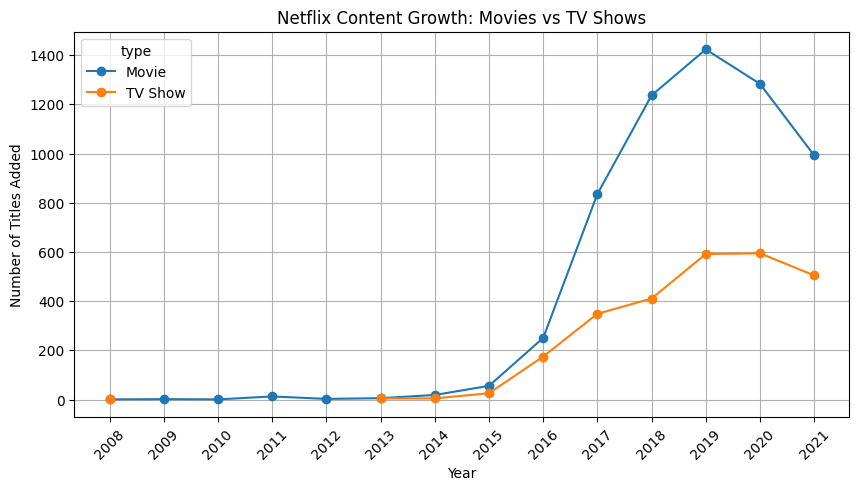

In [151]:

df_grouped = df.groupby(['year_added','type']).size().unstack()
df_grouped.plot(kind='line', figsize=(10,5), marker='o')
plt.title("Netflix Content Growth: Movies vs TV Shows")
plt.ylabel("Number of Titles Added")
plt.xlabel("Year")
plt.xticks(yearly_counts.index, rotation=45)
plt.grid(True)
plt.show()

df=df.drop(columns=['year_added'])

### Top 10 Countries Producing Netflix Content ###

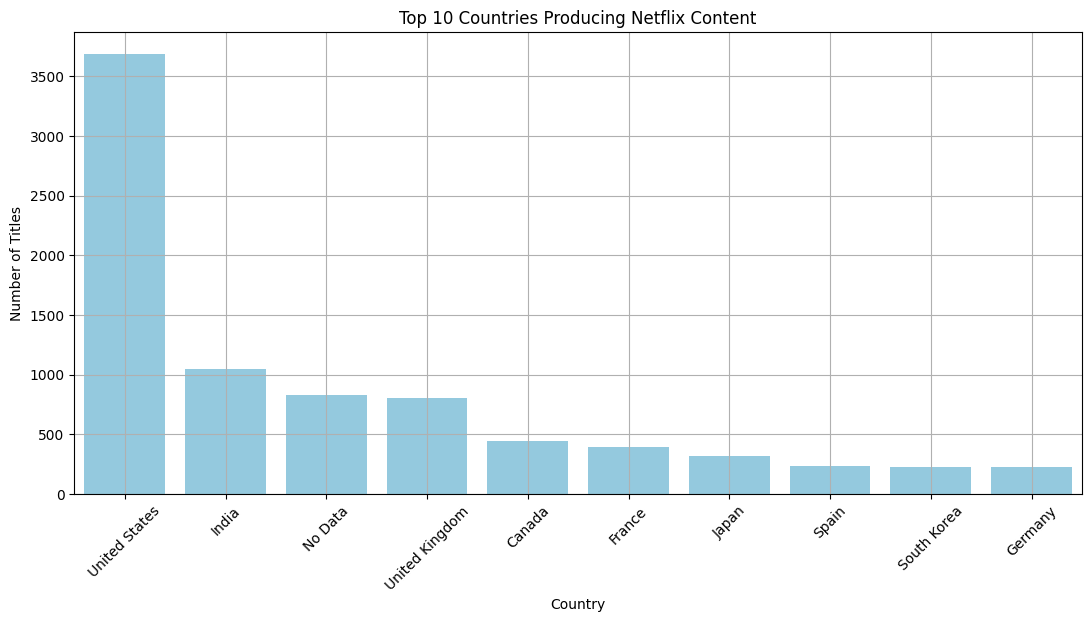

In [182]:

df_exploded=df.assign(country=df['country'].str.split(',')).explode('country')
df_exploded['country']=df_exploded['country'].str.strip()

count_country=df_exploded['country'].value_counts().head(10)

plt.figure(figsize=(13,6))
sns.barplot(x=count_country.index,y=count_country.values,color='skyblue')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### most common age ratings for content ###


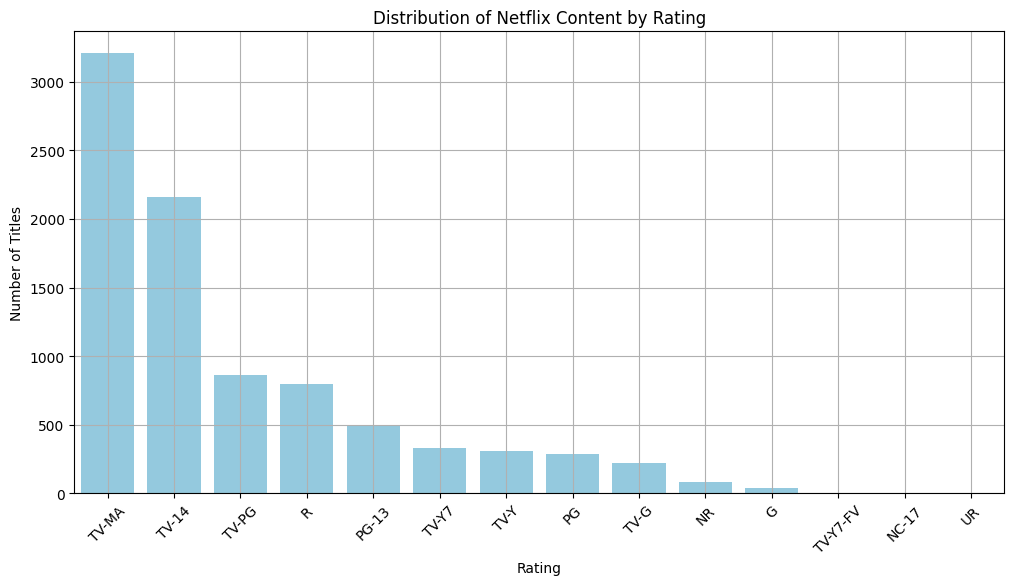

In [153]:
count_ratings=df['rating'].value_counts()

plt.figure(figsize=(12,6))
sns.countplot(data=df,x='rating',color='skyblue',order=df['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Netflix Content by Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

### distribution of movie durations ###


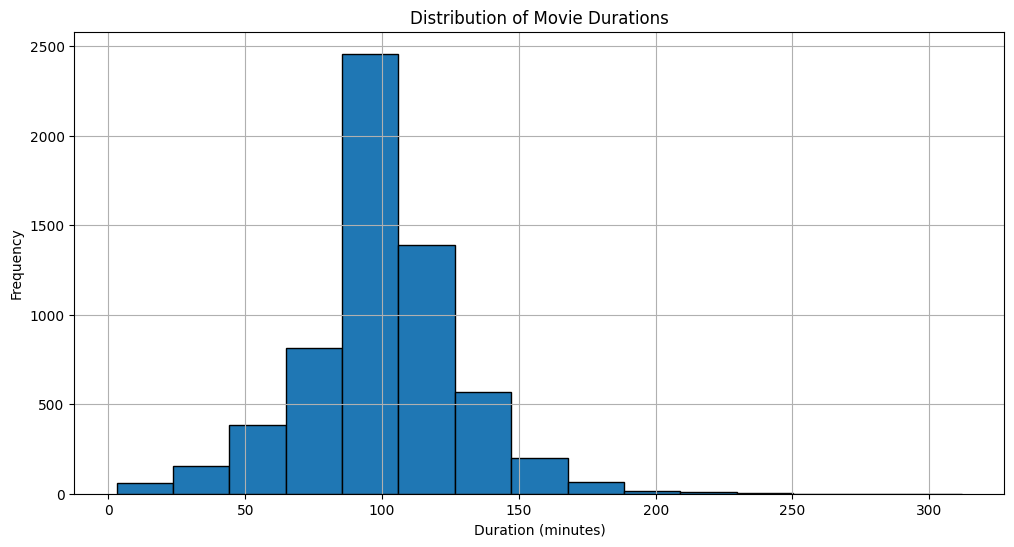

In [154]:
movies=df[df['type']=='Movie']

plt.figure(figsize=(12,6))
plt.hist(movies['duration_minutes'], bins=15, edgecolor='black')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### Determining the most popular content categories ###

Top 10 Genres:
genre_name
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


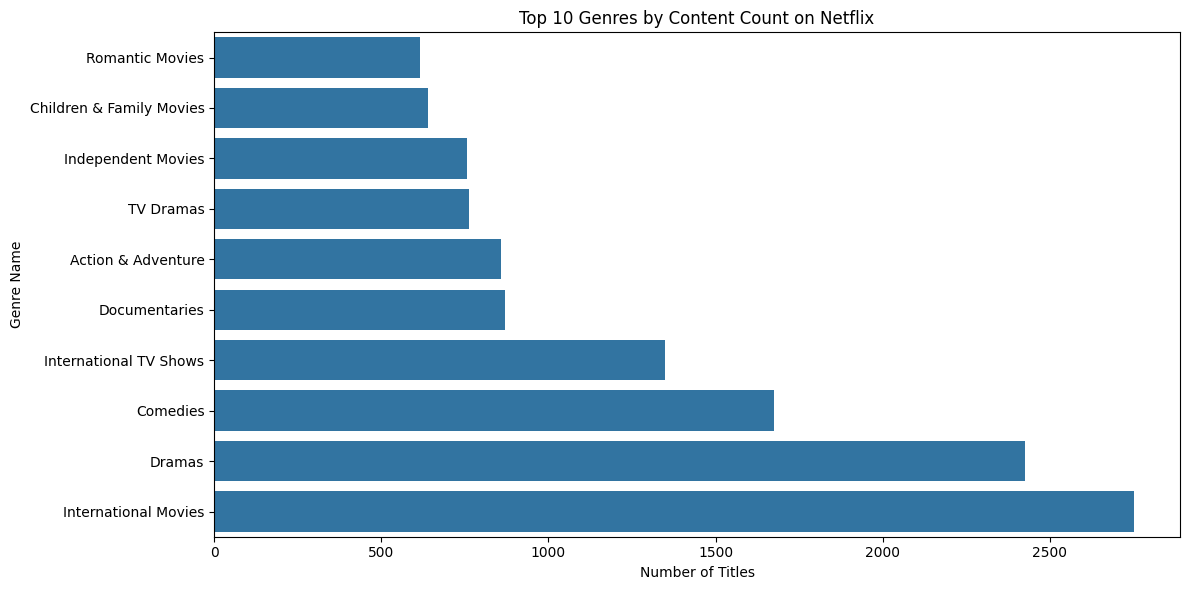

In [183]:

df['listed_in']==df['listed_in'].fillna('Unknown',inplace=True)
df_genres=df.assign(genre_name=df['listed_in'].str.split(', ')).explode('genre_name')

top_10_genres=df_genres['genre_name'].value_counts().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(y=top_10_genres.index,x=top_10_genres.values)
plt.title('Top 10 Genres by Content Count on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre Name')
plt.gca().invert_yaxis()
plt.tight_layout()
print(f"Top 10 Genres:\n{top_10_genres}")


### Content Added to Netflix by Month (Seasonality) ###

Content added by month:
month_added
January      737
February     562
March        741
April        763
May          632
June         728
July         827
August       754
September    769
October      760
November     705
December     812
Name: count, dtype: int64


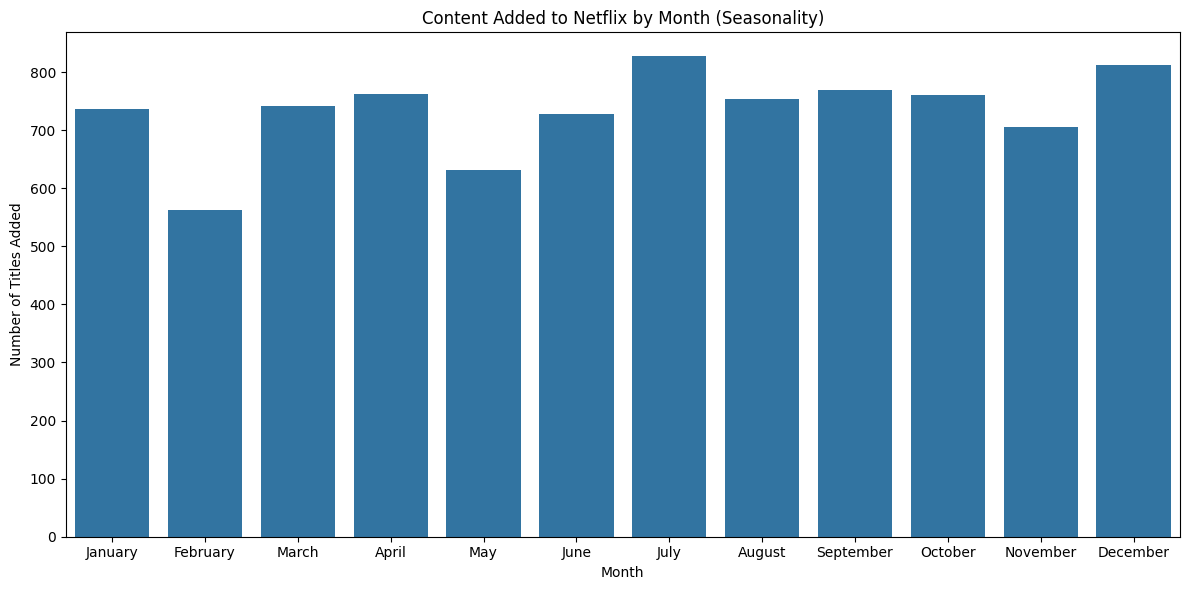

In [184]:
df_valid_dates=df.dropna(subset=['date_added']).copy()
df_valid_dates['month_added']=df_valid_dates['date_added'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_counts=df_valid_dates['month_added'].value_counts().reindex(month_order).fillna(0)
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_counts.index,y=monthly_counts.values)
plt.title('Content Added to Netflix by Month (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.tight_layout()
print(f"Content added by month:\n{monthly_counts}")